<a href="https://colab.research.google.com/github/python-freak/Generating-MNIST-images-with-GANS/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('./data/MNIST_data' , one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as 

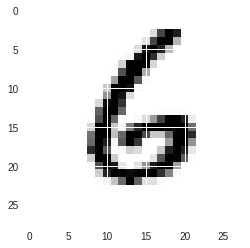

In [5]:
plt.imshow(mnist.train.images[1000].reshape(28,28) , cmap = 'Greys')
#mnist.train.images.shape

In [0]:
def generator(z , reuse = None):
  with tf.variable_scope('gen' , reuse = reuse):
    #tf.reset_default_graph()
    hidden1 = tf.layers.dense(inputs = z , units = 128)
    
    alpha = 0.1
    hidden1 = tf.maximum(alpha*hidden1 , hidden1)
    
    hidden2 = tf.layers.dense(inputs = hidden1 , units = 128)
    hidden2 = tf.maximum(alpha*hidden2 , hidden2)
    
    output = tf.layers.dense(inputs = hidden2 , units = 784 , activation = tf.nn.tanh)
    return output

In [0]:
def discriminator(X , reuse=None):
  
  with tf.variable_scope('dis' , reuse = reuse):
    
    #tf.reset_default_graph()
    
    hidden1 = tf.layers.dense(inputs = X , units = 128)
    alpha = 0.01
    hidden1 = tf.maximum(alpha*hidden1 , hidden1)
    
    hidden2 = tf.layers.dense(inputs = hidden1 , units = 128)
    hidden2 = tf.maximum(alpha*hidden2 , hidden2)
    
    logits = tf.layers.dense(inputs = hidden2 , units = 1)
    output = tf.sigmoid(logits)
    
    return output , logits
  

In [0]:
real_images = tf.placeholder(tf.float32 , shape = [None , 784])
z = tf.placeholder(tf.float32 , shape = [None , 100])

In [0]:
G = generator(z)

In [0]:
D_output_real , D_logits_real = discriminator(real_images)

In [0]:
D_output_fake , D_logits_fake = discriminator(G , reuse = True)

In [0]:
def loss_func(logits_in , labels_in):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_in , labels = labels_in))

In [0]:
D_real_loss = loss_func(D_logits_real , tf.ones_like(D_logits_real) * 0.9 )
D_fake_loss = loss_func(D_logits_fake , tf.zeros_like(D_logits_fake))

In [0]:
D_loss = D_real_loss + D_fake_loss

In [0]:
G_loss = loss_func(D_logits_fake , tf.ones_like(D_logits_fake))

In [0]:
learning_rate = 0.001

In [0]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

In [0]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss , var_list = d_vars)

In [0]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss , var_list = g_vars)

In [0]:
batch_size = 100
epochs = 600

In [0]:
init = tf.global_variables_initializer()

In [0]:
samples = []

In [29]:
with tf.Session() as sess:
  
  sess.run(init)
  
  for epoch in range(epochs):
    
    num_batches = mnist.train.num_examples // batch_size
    
    for i in range(num_batches):
      
      batch = mnist.train.next_batch(batch_size)
      batch_images = batch[0].reshape((batch_size , 784))
      batch_images = batch_images * 2  - 1
      
      batch_z = np.random.uniform(-1 , 1 , size = (batch_size , 100))
      
      _  = sess.run(D_trainer , feed_dict = {real_images:batch_images , z : batch_z})
      _  = sess.run(G_trainer , feed_dict = {z: batch_z})
      
    print("On Epoch {}".format(epoch))
    
    sample_z = np.random.uniform(-1 , 1 , size = (1 , 100))
    gen_sample = sess.run(generator(z,reuse = True) , feed_dict = {z:sample_z})
    
    samples.append(gen_sample)
    

On Epoch 0
On Epoch 1
On Epoch 2
On Epoch 3
On Epoch 4
On Epoch 5
On Epoch 6
On Epoch 7
On Epoch 8
On Epoch 9
On Epoch 10
On Epoch 11
On Epoch 12
On Epoch 13
On Epoch 14
On Epoch 15
On Epoch 16
On Epoch 17
On Epoch 18
On Epoch 19
On Epoch 20
On Epoch 21
On Epoch 22
On Epoch 23
On Epoch 24
On Epoch 25
On Epoch 26
On Epoch 27
On Epoch 28
On Epoch 29
On Epoch 30
On Epoch 31
On Epoch 32
On Epoch 33
On Epoch 34
On Epoch 35
On Epoch 36
On Epoch 37
On Epoch 38
On Epoch 39
On Epoch 40
On Epoch 41
On Epoch 42
On Epoch 43
On Epoch 44
On Epoch 45
On Epoch 46
On Epoch 47
On Epoch 48
On Epoch 49
On Epoch 50
On Epoch 51
On Epoch 52
On Epoch 53
On Epoch 54
On Epoch 55
On Epoch 56
On Epoch 57
On Epoch 58
On Epoch 59
On Epoch 60
On Epoch 61
On Epoch 62
On Epoch 63
On Epoch 64
On Epoch 65
On Epoch 66
On Epoch 67
On Epoch 68
On Epoch 69
On Epoch 70
On Epoch 71
On Epoch 72
On Epoch 73
On Epoch 74
On Epoch 75
On Epoch 76
On Epoch 77
On Epoch 78
On Epoch 79
On Epoch 80
On Epoch 81
On Epoch 82
On Epoch 83
On

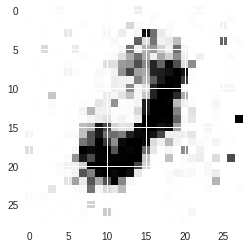

In [31]:
plt.imshow(samples[56].reshape(28,28) , cmap = 'Greys')